# Exploratory Data Analysis: Renewable Energy Performance EU member states

1. Import libraries.
2. Load data into Dataframes from SQL tables.
3. Process/Clean any additional data.
4. Create new dataframes to look at the established questions.  
    i.      What are the top 5 performing EU member states in terms of renewable energy use?  
    ii.     What are the most popular forms of energy used in these countries?    
    iii.    What are the 5 lowest performing EU member states in terms of renewable energy use?  
    iv.     What are the most popular forms of energy in these countries?  
    v.      Which EU member states consume the most energy annually, and what percentage of that consumption comes from renewable sources?  
    vi.     Which EU member states have made the most progress in terms of renewable energy usage from 2015 to 2019, which countries have made the least progress?  
5. Visualize the data to identify patterns or trends: 

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import pymysql
from sqlalchemy import create_engine
import getpass
%matplotlib inline 

# ensure that pd cells are viewable in outputs
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [2]:
# set up connection to MySQL
sql_pass = getpass.getpass('Please input your credentials: ')
connection = 'mysql+pymysql://root:' + sql_pass + '@localhost/energy_stats'
energy_engine = create_engine(connection)

In [3]:
# define sql queries to load dataframes.
# The scope of this analysis is from 2015-2019 filter queries accordingly.

# 1. EU member states renewable energy use
query1 = "select * from energy_consumption_by_product_csv ecbpc where year > 2014 and ecbpc.country <> 'European Union - 27 countries (from 2020)' and ecbpc.country <> 'Euro area - 19 countries  (from 2015)';"
# 2. Energy consumption by product type
query2 = "select * from energy_consumption_by_product_csv ecbpc where year > 2014  and ecbpc.country <> 'European Union - 27 countries (from 2020)' and ecbpc.country <> 'Euro area - 19 countries  (from 2015)' order by product_type; "
# 3. Total percentage of energy from renewables
query3 = "select * from percent_of_total_from_renewable_energy_csv potfrec where year > 2014  and potfrec.country <> 'European Union - 27 countries (from 2020)' and potfrec.country <> 'European Union - 27 countries (2007-2013)' and potfrec.country <> 'Euro area - 19 countries  (from 2015)';"
# 4. Energy production and use
query4 = "select * from (select ge.gross_energy_id, ge.country, ge.year, ge.product_type, ge.1K_tonne_oil_equivalent as gross_energy_produced, te.1K_tonne_oil_equivalent as total_energy_supplied, (ge.1K_tonne_oil_equivalent-te.1K_tonne_oil_equivalent) as unused_energy from gross_energy_by_product_csv ge join total_energy_supplied_by_product_csv te on ge.gross_energy_id = te.total_energy_id) as j1 where year > 2014  and j1.country <> 'European Union - 27 countries (from 2020)' and j1.country <> 'Euro area - 19 countries  (from 2015)';"
# 5. Energy use by socioeconomic sector
query5 = "select * from (select ei.industry_use_id, ei.country,ei.year, ei.fuel_type, ei.1K_tonne_oil_equivalent as industry_use, eh.`1K_tonne_oil_equivalent` as household_use, es.`1K_tonne_oil_equivalent` as services_use from energy_use_by_industry_csv ei join energy_use_by_household_csv eh on ei.industry_use_id = eh.household_use_id join energy_use_in_services_by_fuel_type_csv es on ei.industry_use_id = es.services_use_id) as j1 where year > 2014  and j1.country <> 'European Union - 27 countries (from 2020)' and j1.country <> 'Euro area - 19 countries  (from 2015)';"
# 6. Energy use in transport sector
query6 = "select * from energy_use_in_road_transport_by_fuel_type_csv euirtbftc where year > 2014  and euirtbftc.country <> 'European Union - 27 countries (from 2020)' and euirtbftc.country <> 'Euro area - 19 countries  (from 2015)';"
query7 = "select * from energy_use_in_transport_by_fuel_type_csv euitbftc where year > 2014 and euitbftc.country <> 'European Union - 27 countries (from 2020)' and euitbftc.country <> 'Euro area - 19 countries  (from 2015)';"


In [4]:
# Load data frames
energy_use_by_state = pd.read_sql_query(query1, energy_engine)
energy_use_product = pd.read_sql_query(query2, energy_engine)
renewable_use_percentage = pd.read_sql_query(query3, energy_engine)
energy_production_product = pd.read_sql_query(query4, energy_engine)

# These additional data frames can be used for further analysis of energy use in other sectors of each country
# but were outside of the scope of this poject.

# energy_use_socioeconomic = pd.read_sql_query(query5, energy_engine)
# energy_use_road_transport = pd.read_sql_query(query6, energy_engine)
# energy_use_other_transport= pd.read_sql_query(query7, energy_engine)
renewable_use_percentage.head()


,percent_of_total_id,country,"TARGET_FLAG,TARGET",year,percent_of_total_energy_from renewables
0,452,European Union - 28 countries (2013-2020),20.0,2015,16.734
1,455,Belgium,13.0,2015,8.026
2,456,Bulgaria,16.0,2015,18.261
3,457,Czechia,13.0,2015,15.067
4,458,Denmark,30.0,2015,30.866


In [5]:
# Load supplementary datasets for presentation investigation.

landmass = pd.read_csv(r'C:\Users\Ish\Documents\Ironhack Bootcamp\PROJECTS\PROJECT1\Energy Statistics\Uncleaned csvs\landmass_by_EU_member_state.csv')
population = pd.read_csv(r'C:\Users\Ish\Documents\Ironhack Bootcamp\PROJECTS\PROJECT1\Energy Statistics\Uncleaned csvs\Population_by_Country_EU.csv')

landmass['Country Name'].unique()
population['Country Name'].unique()


array(['Albania', 'Austria', 'Belgium', 'Bulgaria',
       'Bosnia and Herzegovina', 'Switzerland', 'Cyprus',
       'Czech Republic', 'Germany', 'Denmark', 'Spain', 'Estonia',
       'Finland', 'France', 'United Kingdom', 'Georgia', 'Greece',
       'Croatia', 'Hungary', 'Ireland', 'Iceland', 'Italy', 'Lithuania',
       'Luxembourg', 'Latvia', 'Moldova', 'North Macedonia', 'Malta',
       'Montenegro', 'Netherlands', 'Norway', 'Poland', 'Portugal',
       'Romania', 'Serbia', 'Slovak Republic', 'Slovenia', 'Sweden',
       'Turkey', 'Ukraine', 'Kosovo'], dtype=object)

<AxesSubplot:xlabel='Land Area(sq.km)', ylabel='Country Name'>

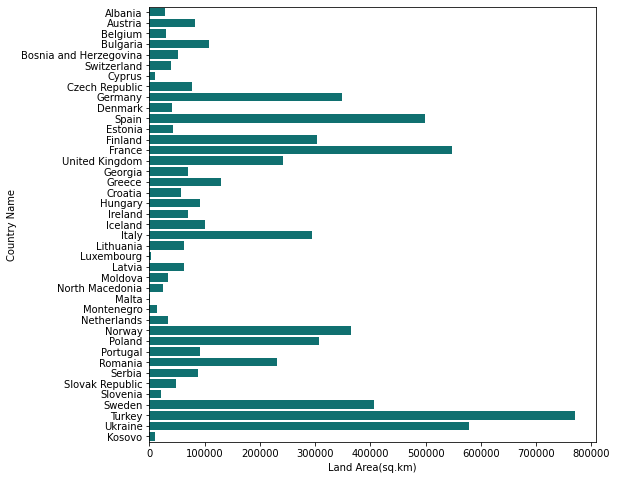

In [6]:
# Visualize the relative land area of each EU country.
eu_geography=  pd.merge(landmass,population, on= 'Country Name')
eu_geography.drop(['Unnamed: 0_x', 'Unnamed: 0_y'], axis = 1, inplace= True)
eu_geography['population density/sq.km'] = round(eu_geography['2020']/eu_geography['Land Area(sq.km)'],2)
fig = plt.figure(figsize = (8,8))
sns.barplot(y = 'Country Name', x = 'Land Area(sq.km)', data = eu_geography, color = 'teal')



<AxesSubplot:xlabel='population density/sq.km', ylabel='Country Name'>

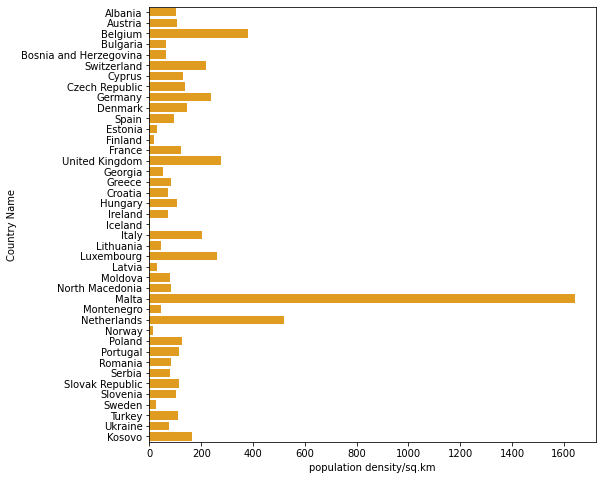

In [7]:
# Visualize the relative distributions of population density by EU country.
fig = plt.figure(figsize = (8,8))
sns.barplot(y = 'Country Name', x = 'population density/sq.km', data = eu_geography, color = 'orange' )

In [8]:
eu_geography.to_csv('eu_geographic.csv')
eu_geography.head()

,Country Name,Land Area(sq.km),Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,population density/sq.km
0,Albania,27400.0,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,2081695.0,2135479.0,2187853.0,2243126.0,2296752.0,2350124.0,2404831.0,2458526.0,2513546.0,2566266.0,2617832.0,2671997.0,2726056.0,2784278.0,2843960.0,2904429.0,2964762.0,3022635.0,3083605.0,3142336.0,3227943.0,3286542.0,3266790.0,3247039.0,3227287.0,3207536.0,3187784.0,3168033.0,3148281.0,3128530.0,3108778.0,3089027.0,3060173.0,3051010.0,3039616.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,2837743.0,103.57
1,Austria,82520.0,AUT,"Population, total",SP.POP.TOTL,7047539.0,7086299.0,7129864.0,7175811.0,7223801.0,7270889.0,7322066.0,7376998.0,7415403.0,7441055.0,7467086.0,7500482.0,7544201.0,7586115.0,7599038.0,7578903.0,7565525.0,7568430.0,7562305.0,7549425.0,7549433.0,7568710.0,7574140.0,7561910.0,7561434.0,7564985.0,7569794.0,7574586.0,7585317.0,7619567.0,7677850.0,7754891.0,7840709.0,7905633.0,7936118.0,7948278.0,7959017.0,7968041.0,7976789.0,7992324.0,8011566.0,8042293.0,8081957.0,8121423.0,8171966.0,8227829.0,8268641.0,8295487.0,8321496.0,8343323.0,8363404.0,8391643.0,8429991.0,8479823.0,8546356.0,8642699.0,8736668.0,8797566.0,8840521.0,8879920.0,8917205.0,108.06
2,Belgium,30280.0,BEL,"Population, total",SP.POP.TOTL,9153489.0,9183948.0,9220578.0,9289770.0,9378113.0,9463667.0,9527807.0,9580991.0,9618756.0,9646032.0,9655549.0,9673162.0,9711115.0,9741720.0,9772419.0,9800700.0,9818227.0,9830358.0,9839534.0,9848382.0,9859242.0,9858982.0,9856303.0,9855520.0,9855372.0,9858308.0,9861823.0,9870234.0,9901664.0,9937697.0,9967379.0,10004486.0,10045158.0,10084475.0,10115603.0,10136811.0,10156637.0,10181245.0,10203008.0,10226419.0,10251250.0,10286570.0,10332785.0,10376133.0,10421137.0,10478617.0,10547958.0,10625700.0,10709973.0,10796493.0,10895586.0,11038264.0,11106932.0,11159407.0,11209057.0,11274196.0,11331422.0,11375158.0,11427054.0,11488980.0,11555997.0,381.64
3,Bulgaria,108560.0,BGR,"Population, total",SP.POP.TOTL,7867374.0,7943118.0,8012946.0,8078145.0,8144340.0,8204168.0,8258057.0,8310226.0,8369603.0,8434172.0,8489574.0,8536395.0,8576200.0,8620967.0,8678745.0,8720742.0,8758599.0,8804183.0,8814032.0,8825940.0,8861535.0,8891117.0,8917457.0,8939738.0,8960679.0,8960547.0,8958171.0,8971359.0,8981446.0,8876972.0,8718289.0,8632367.0,8540164.0,8472313.0,8443591.0,8406067.0,8362826.0,8312068.0,8256786.0,8210624.0,8170172.0,8009142.0,7837161.0,7775327.0,7716860.0,7658972.0,7601022.0,7545338.0,7492561.0,7444443.0,7395599.0,7348328.0,7305888.0,7265115.0,7223938.0,7177991.0,7127822.0,7075947.0,7025037.0,6975761.0,6927288.0,63.81
4,Bosnia and Herzegovina,51200.0,BIH,"Population, total",SP.POP.TOTL,3225664.0,3288604.0,3353228.0,3417573.0,3478999.0,3535632.0,3586630.0,3632678.0,3675448.0,3717476.0,3760536.0,3805286.0,3851153.0,3897259.0,3942221.0,3985107.0,4025271.0,4063188.0,4100355.0,4138816.0,4179850.0,4222479.0,4265183.0,4307907.0,4350566.0,4392135.0,4435925.0,4479516.0,4509462.0,4507819.0,4463422.0,4369320.0,4233673.0,4078940.0,3936527.0,3829049.0,3764419.0,3736070.0,3734338.0,3743353.0,3751176.0,3755514.0,3759389.0,3762179.0,3764194.0,3765332.0,3765422.0,3762791.0,3754261.0,3735945.0,3705478.0,3661173.0,3604972.0,3542598.0,3482106.0,3429362.0,3386263.0,3351534.0,3323929.0,3300998.0,3280815.0,64.08


In [9]:
# The European Union and Euro Area aggregate columns are creating extreme variances in the distribution of the data.
# Create dataframes without the 'European Union 28 countries' markers.
def EU_dropper(df):
    newdf = df[df['country']!='European Union - 28 countries (2013-2020)']
    return newdf

energy_states = EU_dropper(energy_use_by_state)
renewable_percentage = EU_dropper(renewable_use_percentage)
energy_production = EU_dropper(energy_production_product)



In [10]:
energy_states['product_type'].unique()
#renewable_percentage.head()
#energy_socioeconomic.head()

array(['Total', 'Solid fossil fuels', 'Manufactured gases',
       'Peat and peat products', 'Oil shale and oil sands\t',
       'Natural gas', 'Oil and petroleum products',
       'Renewables and biofuels\t', 'Non-renewable waste', 'Electricity',
       'Heat'], dtype=object)

In [11]:
energy_states.head()

,energy_product_id,country,product_type,year,1K_tonne_oil_equivalent
1,2368,Belgium,Total,2015,33096.90
2,2369,Bulgaria,Total,2015,9388.55
3,2370,Czechia,Total,2015,23093.90
4,2371,Denmark,Total,2015,13530.00
5,2372,Germany (until 1990 former territory of the FRG),Total,2015,199966.00


In [12]:
# define function to plot percentage based measures

def energy_percent_plot(df, percent = 'percent_of_total_energy_from_renewables'):
    columns = df.columns
    for year in range(2015,2020):
        filter1 = df['year'] == year
        newframe = df[filter1]
        fig = plt.figure(figsize= (10,10))
        sns.barplot(y='country',x = percent, data = newframe, color = 'LightGreen')
        plt.ylabel('Country')
        plt.xlabel(f'Energy Usage/{percent}')
        #plt.xticks(rotation = 90 )
        plt.title(f'Energy from Renewables as Percentage of Total ({year})', fontsize = 14)
        plt.show()


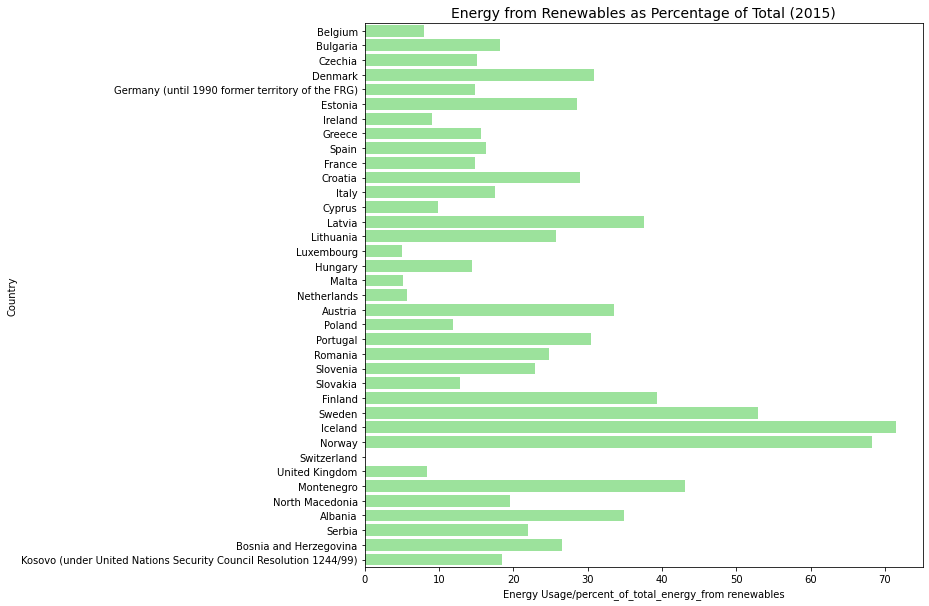

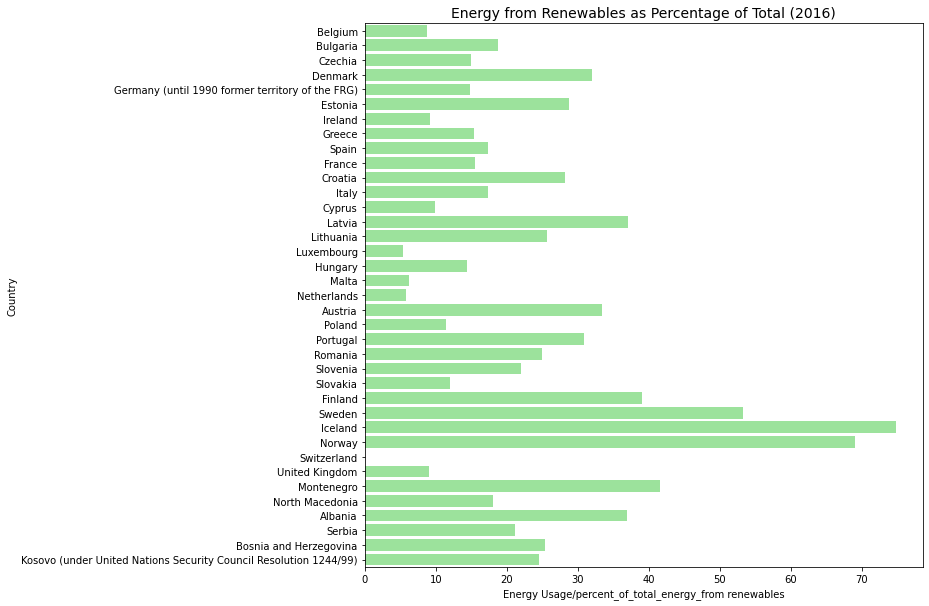

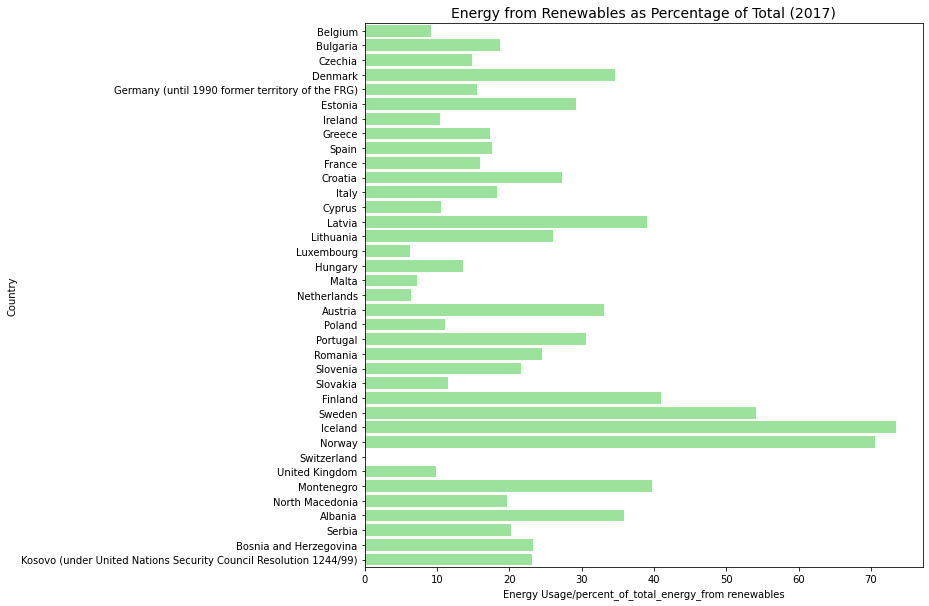

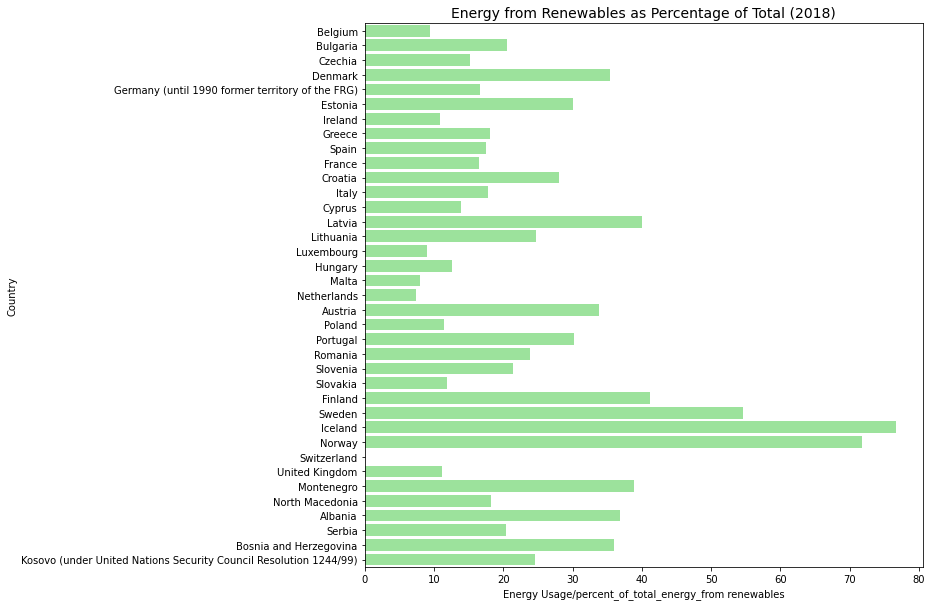

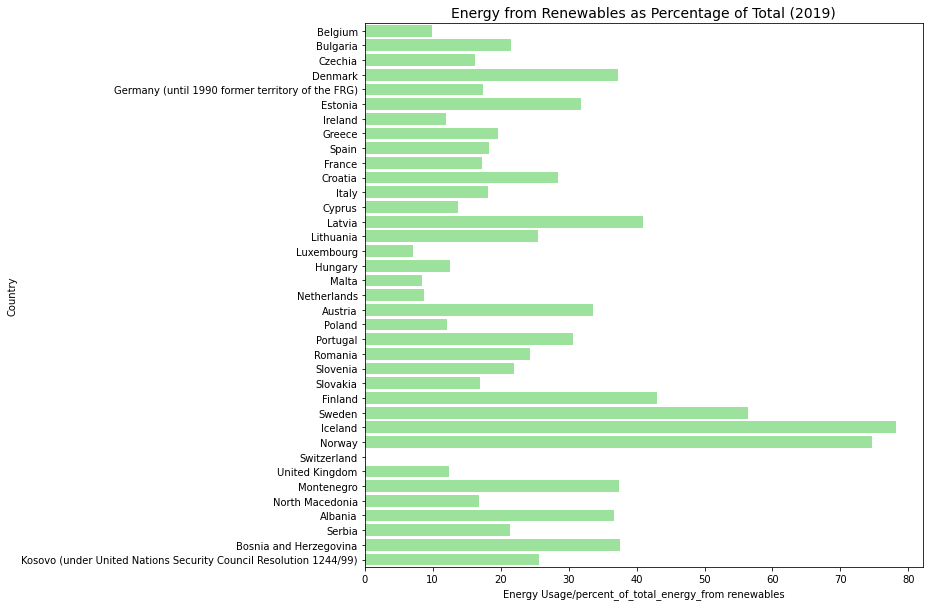

In [13]:
# Visualize Percentage of Renewable Energy consumption by each country
renewable_percentage.head()
energy_percent_plot(renewable_percentage, percent = 'percent_of_total_energy_from renewables')

In [14]:
# define function to filter individual years and product types and produce plots

def energy_plot(df, nrg ='product_type', feature1 = 'country', feature2 = '1K_tonne_oil_equivalent'):
    columns = df.columns
    for category in df[nrg].unique():
        for year in range(2015,2020):
            Total = df[df[nrg]=='Total']
            filter1 = df[nrg] == category
            filter2 = df['year'] == year
            newframe = df[filter1]
            newframeyear = newframe[filter2]
            fig = plt.figure(figsize= (10,10))
            sns.barplot(y='country',x =feature2, data = Total, color = 'grey')
            sns.barplot(y='country',x =feature2, data = newframeyear, color = 'yellow')
            plt.ylabel(f'{feature1}')
            plt.xlabel(f'Energy Usage/{feature2}')
            plt.xticks(rotation = 90 )
            plt.title(f'Use of energy from {category.title()} ({year})', fontsize = 14)
            plt.show()
            


# Visualize the proportions of energy from different fuels-energy products of total energy  
1. Look out for fuels/product types that are consistently high across the years.
2. Look out for fuels/product types that experience a gradual decrease.


In [ ]:
energy_plot(energy_states)


In [16]:
# filter out the energy use from renewable sources and the energy by total and visualize energy usage.
energy_states_pivot = energy_states.pivot(index = ['country', 'year'], columns = 'product_type', values = '1K_tonne_oil_equivalent').reset_index()

energy_states_renewable = energy_states_pivot[['country','year', 'Renewables and biofuels\t', 'Total']]


# Determine top / bottom renewable energy use by largest consumers  
We want to know which countries are using the most renewable energy in the EU.  
The top 5 by total use of energy could be useful in providing insight into which countries may be investing in   
utilizing renewable energy and from there what sort of environment exists for the growth of renewable energy interests.  

1. perform value counts on the unique values.
2. The aim is to collect a record from each year for each of the years 2015-2019.

In [17]:
energy_states_renewables = energy_states_renewable.sort_values('Renewables and biofuels\t', ascending =False)
energy_states_renewables['country'].head(32).value_counts()
#energy_states_renewables['country'].tail(26).value_counts()

Germany (until 1990 former territory of the FRG)    5
France                                              5
Italy                                               5
Sweden                                              5
Spain                                               5
Finland                                             3
Poland                                              3
United Kingdom                                      1
Name: country, dtype: int64

In [18]:
# Store the results as pd.datafranes then adding them to a single dataframe for use
Germany = energy_use_by_state[energy_use_by_state['country'] == 'Germany (until 1990 former territory of the FRG)']
France = energy_use_by_state[energy_use_by_state['country'] == 'France']
Spain =  energy_use_by_state[energy_use_by_state['country'] == 'Spain']
Sweden =  energy_use_by_state[energy_use_by_state['country'] == 'Sweden']
Italy =  energy_use_by_state[energy_use_by_state['country'] == 'Italy']

top_5_renewables_by_gross_use = pd.concat([Germany,France,Sweden,Spain,Italy])
T5= top_5_renewables_by_gross_use.pivot(index = ['country', 'year'], columns = 'product_type', values = '1K_tonne_oil_equivalent').reset_index()

# fill missing Electricity values with the difference between the Total and the sum of the other features.
T5['Electricity'] = T5['Total'] - (T5['Heat'] + T5['Manufactured gases']+T5['Natural gas']+T5['Non-renewable waste']+ T5['Oil and petroleum products']+ T5['Oil shale and oil sands\t'] + T5['Peat and peat products'] + T5['Renewables and biofuels\t'] + T5['Solid fossil fuels'])
T5.drop('Oil shale and oil sands\t', axis = 1, inplace = True)
T5
# Save the result as a new csv for reuse.

T5.to_csv('Top_5_countries_by_gross_renewable_usage.csv')

In [19]:
Cyprus = energy_use_by_state[energy_use_by_state['country'] == 'Cyprus']
Luxembourg = energy_use_by_state[energy_use_by_state['country'] == 'Luxembourg']
Montenegro =  energy_use_by_state[energy_use_by_state['country'] == 'Montenegro']
Iceland =  energy_use_by_state[energy_use_by_state['country'] == 'Iceland']
Malta =  energy_use_by_state[energy_use_by_state['country'] == 'Malta']

bottom_5_renewables_by_gross_use = pd.concat([Cyprus,Luxembourg,Montenegro,Iceland,Malta])
B5= bottom_5_renewables_by_gross_use.pivot(index = ['country', 'year'], columns = 'product_type', values = '1K_tonne_oil_equivalent').reset_index()
B5['Electricity'] = B5['Total'] - (B5['Heat'] + B5['Manufactured gases']+B5['Natural gas']+B5['Non-renewable waste']+ B5['Oil and petroleum products']+ B5['Oil shale and oil sands\t'] + B5['Peat and peat products'] + B5['Renewables and biofuels\t'] + B5['Solid fossil fuels'])
B5.drop('Oil shale and oil sands\t', axis = 1, inplace = True)
B5.to_csv('Bottom_5_countries_by_gross_renewable_usage.csv')

# Determine the top 5 and bottom 5 performing member states by percentage of energy from renewables
We want to know which countries perform the best in terms of using renewable energy.  
The top 5 by percentage of their total use might provide some insight into what kind of countries are better at   
utilizing renewable energy than countries that might produce or consume a lot of energy from non-renewable sources. 

In [103]:

renewable_percentage = EU_dropper(renewable_percentage)
renewable_percentage = renewable_percentage[renewable_percentage['country']!= 'Switzerland']
renewable_percentage.sort_values(['percent_of_total_energy_from renewables'], ascending = False, inplace=True)
top_performers = renewable_percentage.head(30)
top_performers['country'].value_counts()

bottom_performers = renewable_percentage.tail(38)
bottom_performers['country'].value_counts()


Ireland           5
Belgium           5
Luxembourg        5
Netherlands       5
Malta             5
Poland            4
United Kingdom    4
Cyprus            3
Slovakia          2
Name: country, dtype: int64

In [21]:
Iceland = energy_use_by_state[energy_use_by_state['country'] == 'Iceland']
Norway = energy_use_by_state[energy_use_by_state['country'] == 'Norway']
Sweden =  energy_use_by_state[energy_use_by_state['country'] == 'Sweden']
Finland =  energy_use_by_state[energy_use_by_state['country'] == 'Finland']
Montenegro =  energy_use_by_state[energy_use_by_state['country'] == 'Montenegro']

top_5_renewables_by_percent = pd.concat([Iceland,Norway,Sweden,Finland,Montenegro])
T= top_5_renewables_by_percent.pivot(index = ['country', 'year'], columns = 'product_type', values = '1K_tonne_oil_equivalent').reset_index()
T['Electricity'] = T['Total'] - (T['Heat'] + T['Manufactured gases']+T['Natural gas']+T['Non-renewable waste']+ T['Oil and petroleum products']+ T['Oil shale and oil sands\t'] + T['Peat and peat products'] + T['Renewables and biofuels\t'] + T['Solid fossil fuels'])
T.drop('Oil shale and oil sands\t', axis = 1, inplace = True)

T.to_csv('Top_5_countries_by_percent_renewable_usage.csv')

In [22]:
# Bottom 5
Belgium = energy_use_by_state[energy_use_by_state['country'] == 'Cyprus']
Nederlands = energy_use_by_state[energy_use_by_state['country'] == 'Netherlands']
Luxembourg =  energy_use_by_state[energy_use_by_state['country'] == 'Luxembourg']
Malta =  energy_use_by_state[energy_use_by_state['country'] == 'Malta']
Ireland =  energy_use_by_state[energy_use_by_state['country'] == 'Ireland']

bottom_5_renewables_by_percent = pd.concat([Belgium,Nederlands,Luxembourg,Malta,Ireland])
B= bottom_5_renewables_by_percent.pivot(index = ['country', 'year'], columns = 'product_type', values = '1K_tonne_oil_equivalent').reset_index()
B['Electricity'] = B['Total'] - (B['Heat'] + B['Manufactured gases']+B['Natural gas']+B['Non-renewable waste']+ B['Oil and petroleum products']+ B['Oil shale and oil sands\t'] + B['Peat and peat products'] + B['Renewables and biofuels\t'] + B['Solid fossil fuels'])
B.drop(['Manufactured gases','Oil shale and oil sands\t'], axis = 1, inplace = True)
B.to_csv('Bottom_5_countries_by_percent_renewable_usage.csv')
B

product_type,country,year,Electricity,Heat,Natural gas,Non-renewable waste,Oil and petroleum products,Peat and peat products,Renewables and biofuels\t,Solid fossil fuels,Total
0,Cyprus,2015,351.798,1.218,0.000,12.324,937.759,0.000,117.142,3.679,1423.920
1,Cyprus,2016,378.287,1.194,0.000,15.835,975.140,0.000,120.154,0.000,1490.610
2,Cyprus,2017,390.529,1.287,0.000,21.553,999.544,0.000,135.657,2.980,1551.550
3,Cyprus,2018,401.085,1.286,0.000,22.969,949.683,0.000,192.633,13.614,1581.270
4,Cyprus,2019,406.155,1.229,0.000,30.786,974.935,0.000,197.276,17.199,1627.580
5,Ireland,2015,2217.457,0.000,1711.460,43.983,5605.360,201.005,358.828,332.207,10470.300
6,Ireland,2016,2268.002,0.000,1790.190,41.707,5881.760,197.305,390.377,299.859,10869.200
7,Ireland,2017,2290.316,0.000,1817.520,56.862,5773.320,188.705,461.360,294.917,10883.000
8,Ireland,2018,2396.995,0.000,1957.700,54.733,5990.950,196.957,464.650,325.715,11387.700
9,Ireland,2019,2444.008,0.000,1968.480,56.673,5921.800,183.493,487.697,234.449,11296.600


# Determine 5 countries with the largest growth in renewable energy use from 2015-2019

In [23]:
renewable_percentage_timeseries = pd.read_csv(r'C:\Users\Ish\Documents\Ironhack Bootcamp\PROJECTS\PROJECT1\Energy Statistics\Energy stats cleaned csvs\renewables_percentage_timeseries.csv')


In [24]:
top_5_developing = renewable_percentage_timeseries.sort_values('Increase in Renewable Use', ascending = False).head()

top_5_developing['country'].unique()

array(['Bosnia and Herzegovina',
       'Kosovo (under United Nations Security Council Resolution 1244/99)',
       'Iceland', 'Norway', 'Denmark'], dtype=object)

In [25]:
top_5_developing.to_csv('top_5_growing_renewable_markets.csv')


In [26]:
Bosnia_Herzegovina= energy_use_by_state[energy_use_by_state['country'] == 'Bosnia and Herzegovina']
Kosovo = energy_use_by_state[energy_use_by_state['country'] == 'Kosovo (under United Nations Security Council Resolution 1244/99)']
Iceland =  energy_use_by_state[energy_use_by_state['country'] == 'Iceland']
Norway =  energy_use_by_state[energy_use_by_state['country'] == 'Norway']
Denmark =  energy_use_by_state[energy_use_by_state['country'] == 'Denmark']

fastest_5_by_increase = pd.concat([Bosnia_Herzegovina, Kosovo, Iceland, Norway,Denmark])
fast= fastest_5_by_increase.pivot(index = ['country', 'year'], columns = 'product_type', values = '1K_tonne_oil_equivalent').reset_index()
fast['Electricity'] = fast['Total'] - (fast['Heat'] + fast['Manufactured gases']+fast['Natural gas']+fast['Non-renewable waste']+ fast['Oil and petroleum products']+ fast['Oil shale and oil sands\t'] + fast['Peat and peat products'] + fast['Renewables and biofuels\t'] + fast['Solid fossil fuels'])
fast.drop(['Manufactured gases','Oil shale and oil sands\t'], axis = 1, inplace = True)
fast.to_csv('top_5_developing_renewable_markets.csv')
fast.head()


product_type,country,year,Electricity,Heat,Natural gas,Non-renewable waste,Oil and petroleum products,Peat and peat products,Renewables and biofuels\t,Solid fossil fuels,Total
0,Bosnia and Herzegovina,2015,917.892,124.152,131.814,0.0,1255.95,0.0,500.717,281.006,3316.91
1,Bosnia and Herzegovina,2016,953.396,126.111,135.877,0.0,1451.21,0.0,497.746,274.975,3543.93
2,Bosnia and Herzegovina,2017,980.047,127.257,148.776,0.0,1475.35,0.0,401.377,264.879,3497.93
3,Bosnia and Herzegovina,2018,985.039,126.899,148.066,0.0,1436.03,0.0,1126.830,278.851,4211.93
4,Bosnia and Herzegovina,2019,945.232,122.480,139.983,0.0,1498.51,0.0,1175.120,189.932,4192.65


In [98]:
# Save energy_states as a csv for later use in visualization.
energy_states.to_csv('energy_use_by_country.csv')

In [173]:
# Look at geographic characteristics of the top5 and bottom 5 countries to see if there is some common factor at work.
# Import european GDP, solar irradiation and local windspeed data.
# Add to a dataframe to look at what factors might contribute to improved renewable use from wind and solar energy.

eu_gdp = pd.read_csv('euGDP.csv')
solar_irradiation =  pd.read_csv('meansunshinehourseu_melt.csv')
local_windspeed = pd.read_csv('localwindspeed_melt.csv')
onshorewind_productivity = pd.read_csv('onshorewind_melt.csv')

eu_gdp.shape
solar_irradiation.shape
local_windspeed.shape
onshorewind_productivity.shape


(185, 4)

In [174]:
# concatenate local windspeed and onshorewind_productivity values
wind_indicators = pd.merge(local_windspeed,onshorewind_productivity)
wind_indicators.drop('Unnamed: 0', axis = 1, inplace = True)
wind_indicators.head()

,Date,Country,Average Windspeed(m/s),Total Energy MWh
0,2015-12-31,Albania,2.49,0.0
1,2016-12-31,Albania,2.61,0.0
2,2017-12-31,Albania,2.64,0.0
3,2018-12-31,Albania,2.58,0.0
4,2019-12-31,Albania,2.67,0.0


In [175]:
# add solar irradiation to dataframe
renewable_energy_factors = pd.merge(wind_indicators,solar_irradiation)
renewable_energy_factors.drop('Unnamed: 0', axis = 1, inplace = True)

In [176]:
# select years 2015-2020 from EU geography
eu_geography_short = eu_geography[['Country Name', 'Land Area(sq.km)','2015','2016','2017','2018','2019','population density/sq.km']]
eu_gdp.head()

,Unnamed: 0,Country Name,Indicator Name,2015,2016,2017,2018,2019,2020
0,5,Albania,GDP (current US$),1.138685e+10,1.186120e+10,1.301969e+10,1.514702e+10,1.528661e+10,1.479962e+10
1,14,Austria,GDP (current US$),3.818176e+11,3.955686e+11,4.162073e+11,4.548726e+11,4.450754e+11,4.289654e+11
2,17,Belgium,GDP (current US$),4.621497e+11,4.757396e+11,5.015229e+11,5.434107e+11,5.332545e+11,5.153325e+11
3,21,Bulgaria,GDP (current US$),5.064744e+10,5.380689e+10,5.897152e+10,6.623016e+10,6.855882e+10,6.910510e+10
4,24,Bosnia and Herzegovina,GDP (current US$),1.621154e+10,1.691333e+10,1.808012e+10,2.018351e+10,2.020248e+10,1.978842e+10


In [243]:
# Select top 5 countries from euGDP, eu_geography, renewable_factors for comparison

# Top 5 by percentage of energy from renewables
top5_perc_eu_geo = eu_geography_short[eu_geography_short['Country Name'].isin(['Iceland','Norway','Sweden','Finland', 'Montenegro'])]
top5_perc_GDP = eu_gdp[eu_gdp['Country Name'].isin(['Iceland','Norway','Sweden','Finland', 'Montenegro'])]
top5_perc_re_factors = renewable_energy_factors[renewable_energy_factors['Country'].isin(['Iceland','Norway','Sweden','Finland', 'Montenegro'])]
top5_perc_energy_use = T[['country','year','Renewables and biofuels\t','Total']]

# Top 5 by net use of renewables
top5_net_eu_geo = eu_geography_short[eu_geography_short['Country Name'].isin(['Germany', 'France', 'Italy', 'Sweden', 'Spain'])]
top5_net_GDP = eu_gdp[eu_gdp['Country Name'].isin(['Germany (until 1990 former territory of the FRG)', 'France', 'Italy', 'Sweden', 'Spain'])]
top5_net_re_factors = renewable_energy_factors[renewable_energy_factors['Country'].isin(['Germany', 'France', 'Italy', 'Sweden', 'Spain'])]
top5_net_energy_use = T5[['country','year','Renewables and biofuels\t','Total']]


In [229]:
top5perc_pivot = top5_perc_energy_use.pivot(index = ['country'], columns='year', values =['Renewables and biofuels\t','Total']).reset_index()
display(top5_perc_eu_geo)
display(top5perc_pivot)


,Country Name,Land Area(sq.km),2015,2016,2017,2018,2019,population density/sq.km
12,Finland,303920.00,5479531.0,5495303.0,5508214.0,5515525.0,5521606.0,18.20
20,Iceland,100250.00,330815.0,335439.0,343400.0,352721.0,360563.0,3.66
28,Montenegro,13450.00,622159.0,622303.0,622373.0,622227.0,622028.0,46.22
30,Norway,365122.96,5188607.0,5234519.0,5276968.0,5311916.0,5347896.0,14.73
37,Sweden,407310.00,9799186.0,9923085.0,10057698.0,10175214.0,10278887.0,25.42


country Renewables and biofuels\t                                \
year                                  2015      2016      2017      2018   
0        Finland                  5383.240  5412.790  6379.180  6599.430   
1        Iceland                   107.634   110.539   117.289   124.990   
2     Montenegro                   169.552   166.829   163.867   150.683   
3         Norway                  1578.920  1790.560  2006.370  1939.600   
4         Sweden                  7548.080  8002.800  8206.650  8240.280   

                    Total                                              
year      2019       2015       2016       2017       2018       2019  
0     6763.270  23049.000  24011.200  24613.500  25075.800  24674.400  
1       98.721   2848.620   2801.370   2848.960   3078.880   2934.490  
2      146.527    662.644    688.761    728.889    729.633    760.625  
3     2146.250  18605.200  18968.700  18818.300  19096.100  18907.300  
4     8210.400  31510.900  32037.700  31867.900  31744.200  31311.500

In [230]:
top5_perc_energy_use
top5_perc_re_factors



,Date,Country,Average Windspeed(m/s),Total Energy MWh,Solar irradiation(mW/sq.m)
70,2015-12-31,Finland,6.15,1.205784e+07,86.12
71,2016-12-31,Finland,5.55,9.683083e+06,91.03
72,2017-12-31,Finland,5.75,1.033026e+07,88.09
73,2018-12-31,Finland,5.68,1.007340e+07,98.50
74,2019-12-31,Finland,5.80,1.043898e+07,91.95
95,2015-12-31,Iceland,6.72,1.679030e+04,90.67
96,2016-12-31,Iceland,5.77,1.318907e+04,95.57
97,2017-12-31,Iceland,5.99,1.398183e+04,86.69
98,2018-12-31,Iceland,6.23,1.490245e+04,86.84
99,2019-12-31,Iceland,6.10,1.431360e+04,88.10


C:\Users\Ish\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Ish\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


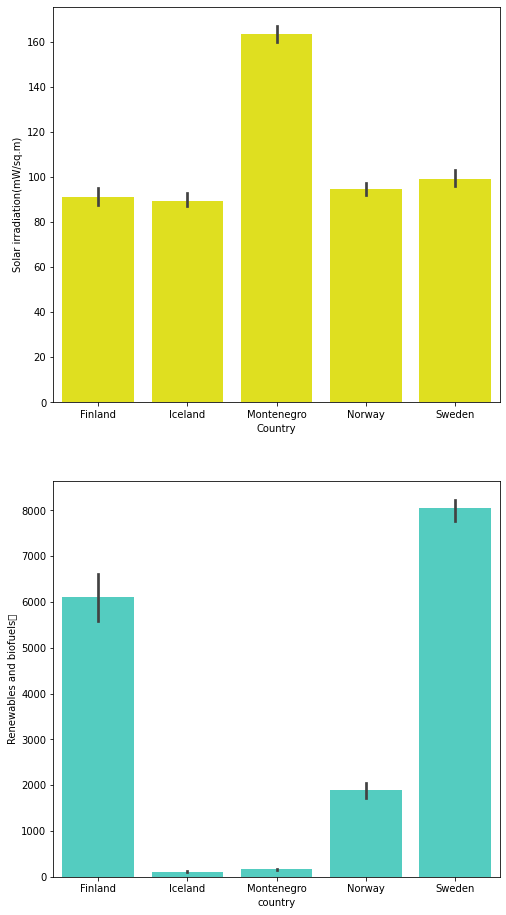

In [231]:
fig, (ax1,ax2) = plt.subplots(2, figsize = (8,16))
axs1 = sns.barplot(x = 'Country', y = 'Solar irradiation(mW/sq.m)', data = top5_perc_re_factors, ax = ax1, color = 'yellow')
axs2 = sns.barplot(x = 'country', y = 'Renewables and biofuels\t', data = top5_perc_energy_use, ax = ax2, color = 'turquoise')

C:\Users\Ish\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Ish\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


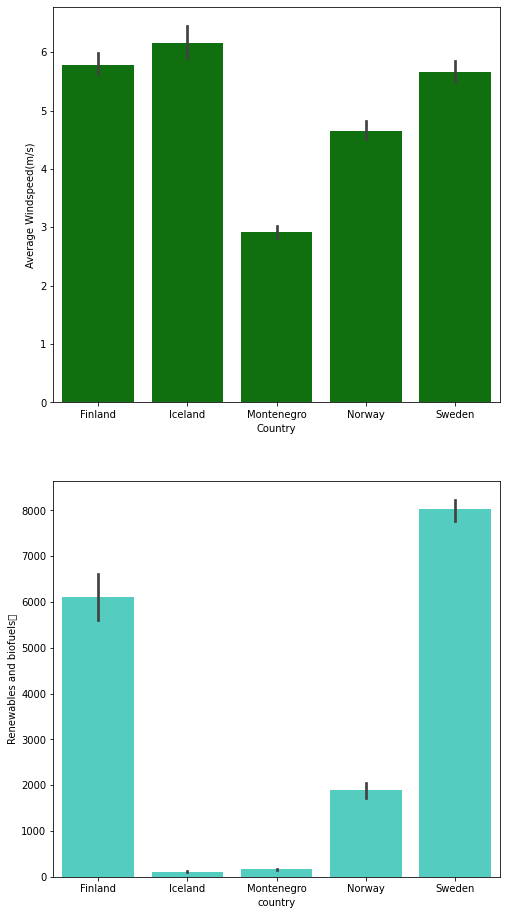

In [232]:
fig, (ax1,ax2) = plt.subplots(2, figsize = (8,16))
axs1 = sns.barplot(x = 'Country', y = 'Average Windspeed(m/s)', data = top5_perc_re_factors, ax = ax1, color = 'green')
axs2 = sns.barplot(x = 'country', y = 'Renewables and biofuels\t', data = top5_perc_energy_use, ax = ax2, color = 'turquoise')

C:\Users\Ish\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Ish\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


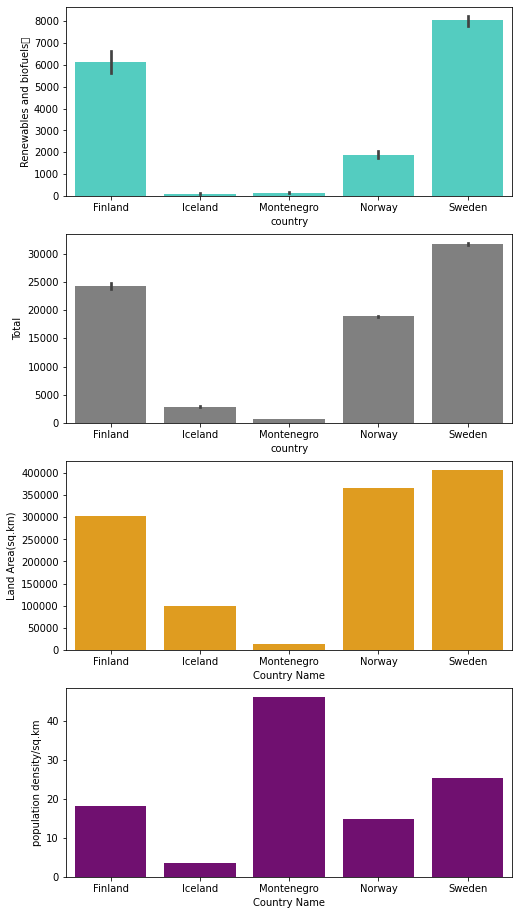

In [233]:
fig, (ax1,ax2,ax3, ax4) = plt.subplots(4, figsize = (8,16))
axs1 = sns.barplot(x = 'country', y = 'Renewables and biofuels\t', data = top5_perc_energy_use, ax = ax1, color = 'turquoise')
axs2 = sns.barplot(x = 'country', y = 'Total', data = top5_perc_energy_use, ax = ax2, color = 'grey')
axs3 = sns.barplot(x = 'Country Name', y = 'Land Area(sq.km)', data = top5_perc_eu_geo, ax = ax3, color = 'orange')
axs4 = sns.barplot(x = 'Country Name', y = 'population density/sq.km', data = top5_perc_eu_geo, ax = ax4, color = 'purple')



C:\Users\Ish\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Ish\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


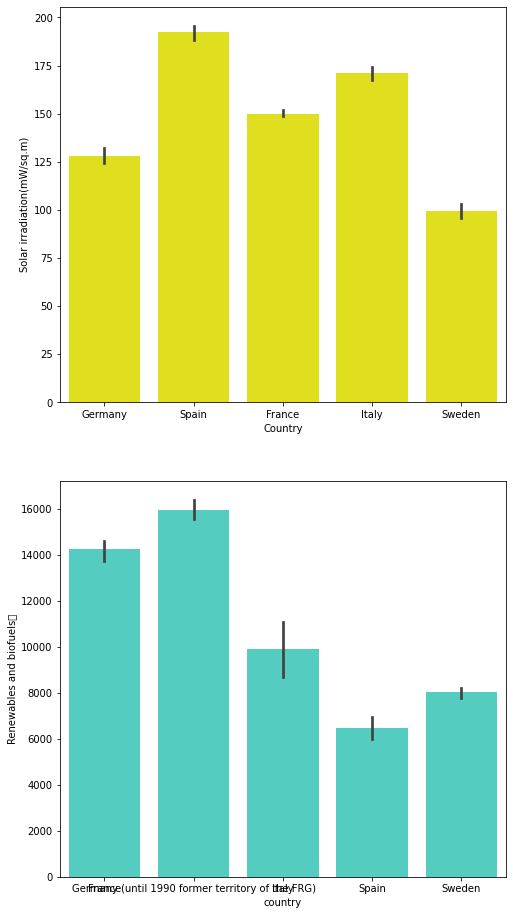

In [239]:
fig, (ax1,ax2) = plt.subplots(2, figsize = (8,16))
axs1 = sns.barplot(x = 'Country', y = 'Solar irradiation(mW/sq.m)', data = top5_net_re_factors, ax = ax1, color = 'yellow')
axs2 = sns.barplot(x = 'country', y = 'Renewables and biofuels\t', data = top5_net_energy_use, ax = ax2, color = 'turquoise')


C:\Users\Ish\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Ish\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


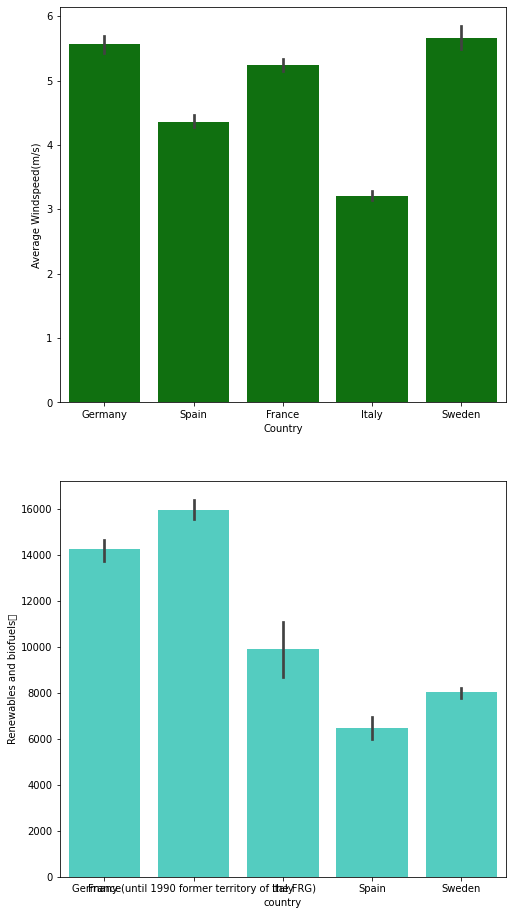

In [240]:
fig, (ax1,ax2) = plt.subplots(2, figsize = (8,16))
axs1 = sns.barplot(x = 'Country', y = 'Average Windspeed(m/s)', data = top5_net_re_factors, ax = ax1, color = 'green')
axs2 = sns.barplot(x = 'country', y = 'Renewables and biofuels\t', data = top5_net_energy_use, ax = ax2, color = 'turquoise')

C:\Users\Ish\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Ish\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


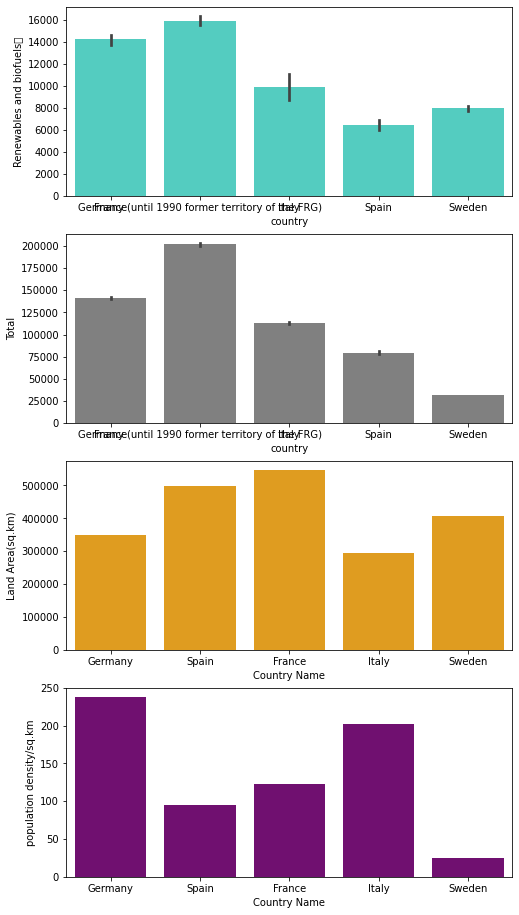

In [244]:
fig, (ax1,ax2,ax3, ax4) = plt.subplots(4, figsize = (8,16))
axs1 = sns.barplot(x = 'country', y = 'Renewables and biofuels\t', data = top5_net_energy_use, ax = ax1, color = 'turquoise')
axs2 = sns.barplot(x = 'country', y = 'Total', data = top5_net_energy_use, ax = ax2, color = 'grey')
axs3 = sns.barplot(x = 'Country Name', y = 'Land Area(sq.km)', data = top5_net_eu_geo, ax = ax3, color = 'orange')
axs4 = sns.barplot(x = 'Country Name', y = 'population density/sq.km', data = top5_net_eu_geo, ax = ax4, color = 'purple')



# Next Steps  

1. Assemble cleaned csvs into xls sheets, consolidated in one single xls file
2. Carry out secondary cleaning/preparation for use (correcting spelling errors,filling empty rows, dropping unused columns etc.)
3. Load completed xls file into Tableau for generating visualizations.